# Исследование компьютерных игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


## Изучение данных из файла

Импорт необходимых для анализа библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/Nshan/Desktop/Сборный проект/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод

1. Необходиом привести названия к нижнему регистру.
2. В столбце с датой релиза необходимо поменять тип на int, так как там указаны только года.
3. В столбце с оценкой критиков нужно сменить тип данных на int, так как там представлены целые значения. Данный аспект не является обязательным, так как в дальнейших расчётах будет удобнее работать с float.
4. В столбце с оценкой юзервом нужно сменить тип данных на float.
5. В столбце с рейтингом и оценкой пользователей встречаются следующие основные аббревиатуры (информация взята из официально [сайта esrb](https://www.esrb.org/ratings-guide/)):
* «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет.
* «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
* «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
* «tbd» («to be determined») — «Будет определено»
* «K-A» («for Kids to Adults»)

## Предварительная обработка данных

### Приведение данных к нужным типам, обработка пропусков и поиск ошибок в данных

In [7]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
df.columns = df.columns.str.lower()

In [9]:
list_columns = ['name', 'platform', 'genre']
for column in list_columns:
    df[column] = df[column].str.lower()

In [10]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
#df['user_score'] = df['user_score'].replace('tbd', pd.NA)
df['year'] = df['year_of_release']
df['year_of_release'] = pd.array(df['year_of_release'], dtype=pd.Int64Dtype())
#df['critic_score'] = pd.array(df['critic_score'], dtype=pd.Int64Dtype())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  year             16446 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


In [11]:
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,1993.0
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,1993.0


In [12]:
df = df.dropna(subset=['name'])

Данных по вриведённым двум играм (где пропуски в их наименованиях) практически нет, объёмы продаж в разных странах небольшой, поэтому удаление этих строчек никак не отразится на результатах анализа.

In [13]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006.0
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985.0
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008.0
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009.0
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996.0


In [14]:
df[df['rating'].isna()]['genre'].value_counts()

action          1181
misc             868
adventure        857
sports           839
role-playing     721
fighting         411
racing           377
strategy         344
platform         319
simulation       305
shooter          304
puzzle           238
Name: genre, dtype: int64

In [15]:
df_genre_rating = df[df['rating'].notna()].pivot_table(index=['genre', 'rating'], values='name', aggfunc='count')
df_genre_rating

name
genre        rating      
action       AO         1
             E        416
             E10+     481
             EC         1
             M        608
             T        681
adventure    E        162
             E10+      68
             EC         2
             M         99
             T        115
fighting     E          8
             E10+      19
             M         49
             T        362
misc         E        457
             E10+     167
             EC         5
             K-A        1
             M         13
             T        239
platform     E        358
             E10+     144
             M          3
             T         64
puzzle       E        289
             E10+      43
             T         10
racing       E        585
             E10+      96
             M         18
             RP         1
             T        172
role-playing E         84
             E10+     111
             M        162
             T        420
shooter      E         48
             E10+      58
             M        565
             T        348
simulation   E        325
             E10+      48
             M          5
             T        190
sports       E       1188
             E10+     107
             M         16
             T        198
strategy     E         70
             E10+      78
             K-A        2
             M         25
             RP         2
             T        162

**Выводы**

1. Названия столбцов приведены к общему виду и к нижнему регистр.
2. Пропуски в столбце с названием игры заменить нельзя, так как информации недостаточно для ее определения.
3. Пропуски в столбце с датой релиза менять не следует. Возможен вариант замены пропусков на среднее значение годов выпуска игр по платформам, но поскольку обнолвения платформ проводятся редко, то имеется большой риск искозить данные.
4. Столбец с оценкой критиков. В данном случае есть два варианта работы: замена пропусков на медианное значение по жанру и оставление пропусков. Поскольку пропусков слишком много не следует заменять на медианное значение, поскольку в случае появления в последствии оценок критиков правильный сдвиг происходить не будет из-за большое концентрации оценок на медианном значении.
5. Значения "tbd" в столбце с оценкой пользователей можно заменить вместе с пропущенными значениями (Nan), так как данное решение статистику не искозит.
6. Столбец с рейтингом. Пропуски в данном случае трогать не следует, так как неизвестно нет достаточных оснаваний полагать, какой рейтинг будет у той или иной игры. Именно поэтому в дальнейшем отметим их соотвествующим образом.
7. Данных по вриведённым двум играм (где пропуски в их наименованиях) практически нет, объёмы продаж в разных странах небольшой, поэтому удаление этих строчек никак не отразится на результатах анализа.
8. Столбцы со строчными данными приведены к нижнему регистру для удобного поиска дубликатов в следующем разделе.

### Обработка дубликатов

In [16]:
df.duplicated().sum()

0

**Выводы**

1. Дубликатов в таблице не обнаружено. Лемматизацию применять нет смысла, так как отдельные данные столбоц таблицы могут совпадать, а совпадение всех элементов таблицы проверены методом duplicated

### Добавление значений в таблицу

In [17]:
df['sum_sales'] = df.apply(lambda row: sum(row[['na_sales','eu_sales','jp_sales','other_sales']]),axis =1)

In [18]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,sum_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006.0,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985.0,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008.0,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009.0,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996.0,31.38


### Выводы

Добавлен столбец с суммарными продажами по регионам.

## Исследовательский анализ рынка

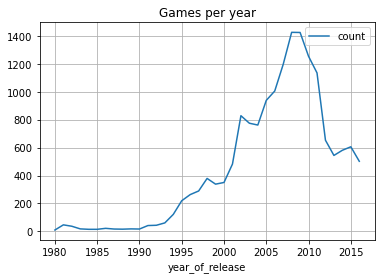

In [19]:
games_count = df.pivot_table(index='year_of_release', values='name', aggfunc=['count'])
games_count.columns = ['count']
games_count.plot(label='game_count', title='Games per year', grid=True, legend=True)

plt.show()

Исходя из построенного графика частоты релиза игр по годам можно сделать вывод, что сфера геминга начала становится очень популярна начиная с 2000-ых годов.

In [20]:
top_10_platforms = df.groupby('platform').agg({'sum_sales': 'sum'}).sort_values(by='sum_sales', ascending=False)[:10]
top_10_platforms.head()

,sum_sales
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.12


In [21]:
df_platform = df.pivot_table(index=['platform', 'year_of_release'], values='sum_sales', aggfunc=['sum'])
df_platform.columns = ['sum_sales']
df_platform['years'] =  df_platform.index.values
df_platform['years'] = df_platform['years'].apply(lambda row: row[1]).astype('int')
#df_platform = df_platform.reset_index()
df_platform.head(20)

sum_sales  years
platform year_of_release                  
2600     1980                 11.38   1980
         1981                 35.68   1981
         1982                 28.88   1982
         1983                  5.84   1983
         1984                  0.27   1984
         1985                  0.45   1985
         1986                  0.67   1986
         1987                  1.94   1987
         1988                  0.74   1988
         1989                  0.63   1989
3do      1994                  0.02   1994
         1995                  0.08   1995
3ds      2011                 63.20   2011
         2012                 51.36   2012
         2013                 56.57   2013
         2014                 43.76   2014
         2015                 27.78   2015
         2016                 15.14   2016
dc       1998                  3.38   1998
         1999                  5.16   1999

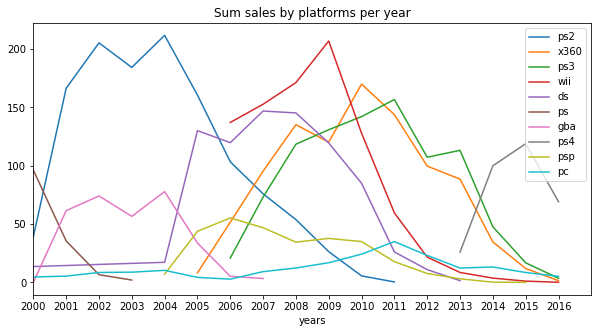

In [22]:
fig, ax = plt.subplots(figsize =(10,5))
for platform in top_10_platforms.index:
    df_platform.loc[platform].plot('years','sum_sales', ax=ax)
    #df_platform[df_platform['platform'] == platform].plot('years','sum_sales', ax=ax, label=platform)
ax.legend(top_10_platforms.index, prop = {'size':10})
ax.set_title('Sum sales by platforms per year')
ax.set_xlim([2000,2017])
ax.set_xticks(np.arange(2000,2017))
ax.set_xticklabels(range(2000,2017))
plt.show()

In [23]:
#df.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc=['sum']).plot(figsize=(10, 5))
#plt.show()

In [24]:
all_platforms = df_platform.index.values
all_pl = []
for i in all_platforms:
    if i[0] not in all_pl:
        all_pl.append(i[0])
print(all_pl)

['2600', '3do', '3ds', 'dc', 'ds', 'gb', 'gba', 'gc', 'gen', 'gg', 'n64', 'nes', 'ng', 'pc', 'pcfx', 'ps', 'ps2', 'ps3', 'ps4', 'psp', 'psv', 'sat', 'scd', 'snes', 'tg16', 'wii', 'wiiu', 'ws', 'x360', 'xb', 'xone']


In [25]:
total = 0
count = 0
for platform in top_10_platforms.index:
    total += len(df_platform.loc[platform])
    count += 1
print(total/count)

11.7


In [26]:
total = 0
count = 0
for platform in all_pl:
    total += len(df_platform.loc[platform])
    count += 1
print(total/count)

7.67741935483871


По графику суммарных продаж по платформам видно, что c 2004 по 2006 в год появлялось минимум по 1 платформе (в 2006 сразу две).
В среднем новые платформы живут 11-12 лет (если рассматривать топ 10 платформ). Если рассматривать все платформы то в среднем платформы живут 7-8 лет.

Акутальным периодом будет считаться 2013-2016 гг., с момента появления ps4.

In [27]:
df_platform_actual = df_platform.query('years >= 2013')
df_platform_actual = df_platform_actual.reset_index()
df_platform_actual.query('platform == "3ds"').head(10)

,platform,year_of_release,sum_sales,years
0,3ds,2013,56.57,2013
1,3ds,2014,43.76,2014
2,3ds,2015,27.78,2015
3,3ds,2016,15.14,2016


In [28]:
df_platform_actual

,platform,year_of_release,sum_sales,years
0,3ds,2013,56.57,2013
1,3ds,2014,43.76,2014
2,3ds,2015,27.78,2015
3,3ds,2016,15.14,2016
4,ds,2013,1.54,2013
5,pc,2013,12.38,2013
6,pc,2014,13.28,2014
7,pc,2015,8.52,2015
8,pc,2016,5.25,2016
9,ps3,2013,113.25,2013


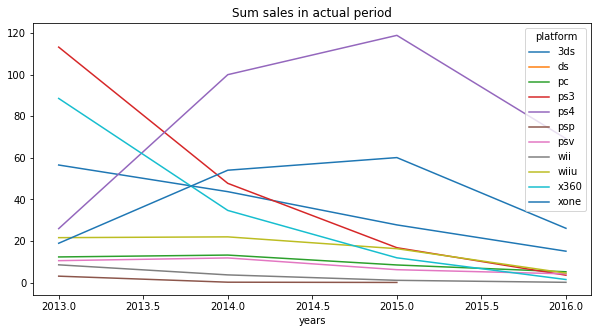

In [29]:
(df_platform_actual
 .pivot_table(index=['years'], columns='platform', values='sum_sales', aggfunc='sum')
 .plot(title='Sum sales in actual period', figsize=(10, 5))
 )
plt.show()

По графику 'Sum sales in actual period' видно, что только две платформы имеют положите тренды - это xone и ps4. Все остальные имеют отрицательные тренды.

По графику 'Sum sales in actual period' можно сделать вывод, что продажам лидируют следующие 5 платформ: ps4, xone, ps3, x360, 3ds.

Потенциально прибыльные платформы - эплатформы имеющие положительный тренд (xone и ps4). Но также к потенциально прибыльном можно отнести PC (хоть и наблюдается небольшая отрицательная корреляция), но продажи по ним более стабильны (отсутствуют резкие отклонения).

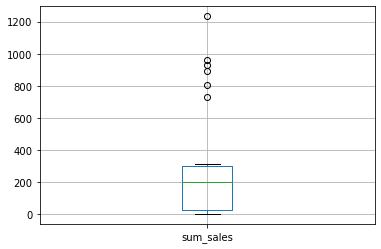

In [30]:
df_platform_actual_res = df_platform.reset_index()
df_platform_global = df_platform_actual_res.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
df_platform_global.boxplot()
plt.show()

По диаграмме размаха можно сделать вывод, что медианное значение продаж по всем платформам равно 200. 50% всех суммарных продаж находятся в пределах 30-280. Минимальный размер продаж близок к нулю, а максимальный к 300. Шесть значение больше 300 - статистические выбросы.  

In [31]:
df=df.query('year >= 2013')

In [32]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,2013.0,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,2013.0,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,2015.0,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,2013.0,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,2014.0,12.62


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  year             2233 non-null   float64
 12  sum_sales        2233 non-null   float64
dtypes: Int64(1), float64(8), object(4)
memory usage: 246.4+ KB


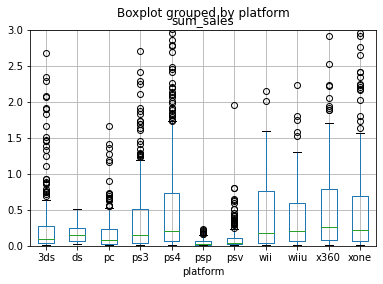

In [34]:
df.boxplot(by='platform', column='sum_sales')
plt.ylim(0, 3)
plt.show()

Медианное значениепо продажам игр больше у крупных и новых консолей чем у остальных. Причём и размах у этих консоле тоже больше, что говорит о том, что высокодоходные игры выпускаются преимущественно на новые мощные консоли.

In [35]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,2013.0,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,2013.0,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,2015.0,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,2013.0,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,2014.0,12.62


In [36]:
df = df.drop('year', 1)

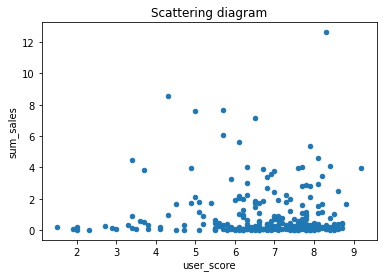

In [37]:
df_ps4 = df.query('platform == "ps4"')
df_ps4.plot(kind='scatter', y='sum_sales', x='user_score', title='Scattering diagram')
plt.show()

In [38]:
df_ps4['sum_sales'].corr(df_ps4['user_score'])

-0.031957110204556424

Корреляция между оценками пользователей и продажами игры на платформе ps4 отсутствует. Встречаются случаи, когда когда высокие оценки совпадают с высокими продажами, что может быть связано с хорошо сформированным коммьюнити определённой игры. Это объясняет ещё и то, почему оценки пользователей могут быть невысокими, но продажи высокими.

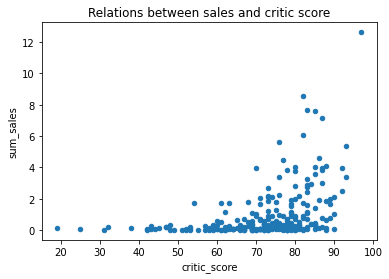

In [39]:
df_ps4.plot(kind='scatter', y='sum_sales', x='critic_score', title='Relations between sales and critic score')
plt.show()

In [40]:
df_ps4['sum_sales'].corr(df_ps4['critic_score'])

0.406567902061781

In [41]:
df_ps4['critic_score'].corr(df_ps4['user_score'])

0.5576539782764632

Существует прямая умеренная корреляция между проадажами и рейтингом критиков. Это связано с тем, что многие игроки в процессе решения выбора игры ориентируются на оценки критиков. Связь не является сильной, так как стоит ещё учитывать фактор рекламы, который сподвигает геймеров покупать игры.

In [42]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1242
user_score         1041
rating              977
sum_sales             0
dtype: int64

In [43]:
plt_list = []
for i in all_pl:
    df_temp = df[(df['platform'] == i)&(df['user_score'].notna())&(df['critic_score'].notna())]
    plt_list.append([i, df_temp['sum_sales'].corr(df_temp['user_score']), df_temp['sum_sales'].corr(df_temp['critic_score'])])
df_temp_fin = pd.DataFrame(columns=['platform', 'user_score', 'critic_score'], data=plt_list)
display(df_temp_fin)

,platform,user_score,critic_score
0,2600,NaN,NaN
1,3do,NaN,NaN
2,3ds,0.272990,0.339235
3,dc,NaN,NaN
4,ds,NaN,NaN
5,gb,NaN,NaN
6,gba,NaN,NaN
7,gc,NaN,NaN
8,gen,NaN,NaN
9,gg,NaN,NaN


In [44]:
df[df['user_score'].notna()].pivot_table(index='platform', values='name', aggfunc='count')

,name
platform,
3ds,80
ds,1
pc,155
ps3,186
ps4,257
psp,2
psv,99
wii,7
wiiu,80


Единой картины между связью оценки пользователей и продажами нет. В основном превалирует ситуация с слобой прямой корреляцией (исключение dc - слабая отрицательная корреляция). Корреляция же между оценкой критиков и продажами носит либо прямой слабый, либо прямой умеренный характер.

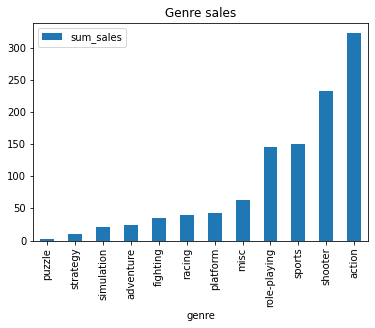

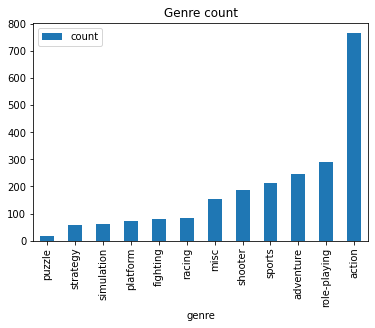

In [45]:
df_genre = df.pivot_table(index='genre', values='sum_sales', aggfunc=['sum', 'count'])
df_genre.columns = ['sum_sales', 'count']
df_genre.sort_values(by='sum_sales', ascending=True).plot(kind='bar', title='Genre sales', legend=True, y='sum_sales')
df_genre.sort_values(by='count', ascending=True).plot(kind='bar', title='Genre count', legend=True, y='count')
plt.show()

Самыми продаваемыми жанрами являются боевики, спорт и шутеры. Наименее продаваемые жанры: стратегии, путешествия и головоломки. Больше всего выпускают игры жанра action. Поскольку количество игр сильно отличается посчитаем медианные продажи игр по жанрам.

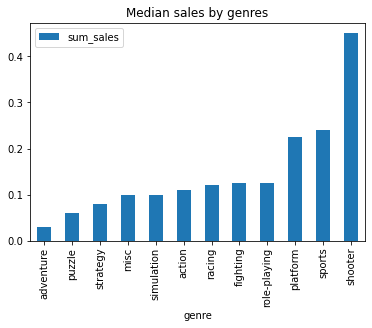

In [46]:
(df
 .pivot_table(index='genre', values='sum_sales', aggfunc='median')
 .sort_values(by='sum_sales')
 .plot(title='Median sales by genres', legend=True, kind='bar')
 )
plt.show()

Наиболее продаваемым жанром является шутер.

In [47]:
df.query('genre == "action"')['platform'].value_counts()

ps4     144
psv     125
3ds     116
ps3     114
xone     85
x360     62
pc       50
wiiu     48
psp      12
wii       8
ds        2
Name: platform, dtype: int64

In [48]:
df.query('genre == "shooter"')['platform'].value_counts()

ps4     41
xone    38
x360    34
pc      32
ps3     31
wiiu     8
psv      2
3ds      1
Name: platform, dtype: int64

Самые продаваемые жанры игры выпускаются на самых продаваемых платформах.

### Выводы

1. Исходя из построенного графика частоты релиза игр по годам можно сделать вывод, что сфера гейминга начала становится очень популярна начиная с 2000-ых годов.
2. По графику суммарных продаж по платформам видно, что c 2004 по 2006 в год появлялось минимум по 1 платформе (в 2006 сразу две).
3. В среднем новые платформы живут 11-12 лет (если рассматривать топ 10 платформ). Если рассматривать все платформы то в среднем платформы живут 7-8 лет.
4. Акутальным периодом будет считаться 2013-2016 гг., с момента появления ps4.
5. По графику 'Sum sales in actual period' видно, что только две платформы имеют положите тренды - это xone и ps4. Все остальные имеют отрицательные тренды.
6. По графику 'Sum sales in actual period' можно сделать вывод, что продажам лидируют следующие 5 платформ: ps4, xone, ps3, x360, 3ds.
7. Потенциально прибыльные платформы - эплатформы имеющие положительный тренд (xone и ps4). Но также к потенциально прибыльном можно отнести PC (хоть и наблюдается небольшая отрицательная корреляция), но продажи по ним более стабильны (отсутствуют резкие отклонения).
8. Корреляция между оценками пользователей и продажами игры на платформе ps4 отсутствует. Встречаются случаи, когда когда высокие оценки совпадают с высокими продажами, что может быть связано с хорошо сформированным коммьюнити определённой игры. Это объясняет ещё и то, почему оценки пользователей могут быть невысокими, но продажи высокими.
9. Существует прямая умеренная корреляция между проадажами и рейтингом критиков. Это связано с тем, что многие игроки в процессе решения выбора игры ориентируются на оценки критиков. Связь не является сильной, так как мнение критиков не всегда сходится с мнением игроков. Некоторые игроки больше склонны доверять мнению игроков.
10. Единой картины между связью оценки пользователей и продажами нет. В основном превалирует ситуация с слобой прямой корреляцией (исключение dc - слабая отрицательная корреляция). Корреляция же между оценкой критиков и продажами носит либо прямой слабый, либо прямой умеренный характер.
11. Самые продаваемые жанры игры выпускаются на самых продаваемых платформах.
12. Медианное значениепо продажам игр больше у крупных и новых консолей чем у остальных. Причём и размах у этих консоле тоже больше, что говорит о том, что высокодоходные игры выпускаются преимущественно на новые мощные консоли.
13. Наиболее продаваемым жанром является шутер.

## Составление портрета пользователя каждого региона

In [49]:
df_na = df.pivot_table(index='platform', values='na_sales', aggfunc='sum')
df_eu = df.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
df_jp = df.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
df_na

,na_sales
platform,
3ds,38.20
ds,0.57
pc,11.11
ps3,63.50
ps4,108.74
psp,0.00
psv,5.04
wii,6.56
wiiu,29.21


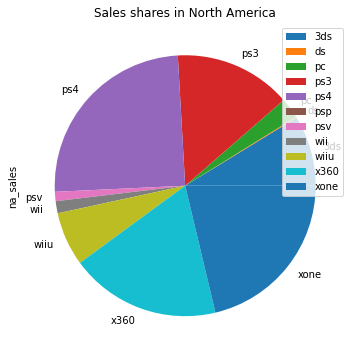

In [50]:
df_na.plot(kind='pie', title='Sales shares in North America', y='na_sales', figsize=(6, 6))
plt.show()

Самые популярные платформы для игр в Северной Америке - это ps4, xone, x360. В Северной Америке основная конкуренция сосредоточена между двумя компаниями Playstation и Xbox. Они делят лидирующие позиции, так как Xbox американская компания и они лучше могут готовить рекламную компанию, так как хорошо знают своих клиентов. Playstation же лидирует, так как это самая популярная платформа в мире и в ней самая большая библиотека игр.

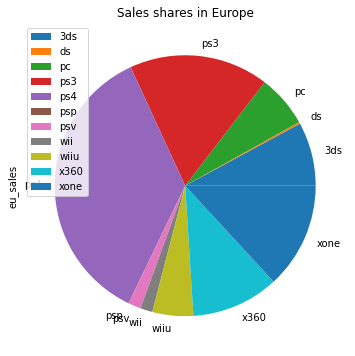

In [51]:
df_eu.plot(kind='pie', y='eu_sales', title='Sales shares in Europe', figsize=(6, 6))
plt.show()

В Европе лидер очевиден, так как чуть больше трети рынка - это ps4. В Европе на первый план вырывается сам продукт с его характеристиками и играми.

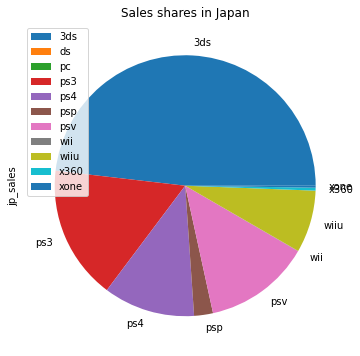

In [52]:
df_jp.plot(kind='pie', y='jp_sales', title='Sales shares in Japan', figsize=(6, 6))
plt.show()

В Японии в лидеры вырывается японская платформа 3ds (почти 50% рынка). Среди возможных причин: лучшее знание японского рынка и потребности населения Японии, более эффективная реклама на территории страны производителя.

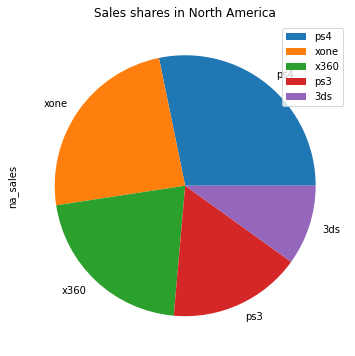

In [53]:
(df_na
 .sort_values(by='na_sales', ascending=False)[:5]
 .plot(kind='pie', title='Sales shares in North America', y='na_sales', figsize=(6, 6))
 )
plt.show()

In [54]:
df_na1 = df_na.sort_values(by='na_sales', ascending=False)[:5]
df_na1['share'] = df_na1['na_sales']/sum(df_na['na_sales'])
df_na1

,na_sales,share
platform,,
ps4,108.74,0.248429
xone,93.12,0.212744
x360,81.66,0.186562
ps3,63.50,0.145073
3ds,38.20,0.087272


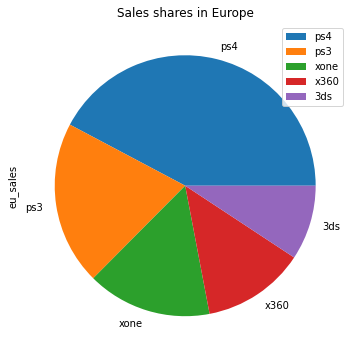

In [55]:
(df_eu
 .sort_values(by='eu_sales', ascending=False)[:5]
 .plot(kind='pie', y='eu_sales', title='Sales shares in Europe', figsize=(6, 6))
 )
plt.show()

In [56]:
df_eu1 = df_eu.sort_values(by='eu_sales', ascending=False)[:5]
df_eu1['share'] = df_eu1['eu_sales']/sum(df_eu['eu_sales'])
df_eu1

,eu_sales,share
platform,,
ps4,141.09,0.359712
ps3,67.81,0.172883
xone,51.59,0.131530
x360,42.52,0.108406
3ds,30.96,0.078933


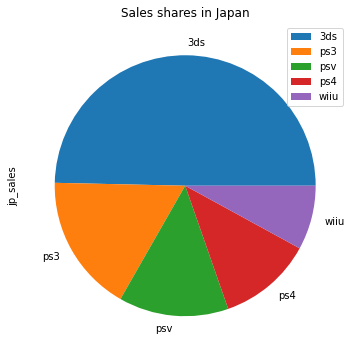

In [57]:
(df_jp
 .sort_values(by='jp_sales', ascending=False)[:5]
 .plot(kind='pie', y='jp_sales', title='Sales shares in Japan', figsize=(6, 6))
 )
plt.show()

In [58]:
df_jp1 = df_jp.sort_values(by='jp_sales', ascending=False)[:5]
df_jp1['share'] = df_jp1['jp_sales']/sum(df_jp['jp_sales'])
df_jp1

,jp_sales,share
platform,,
3ds,67.81,0.481674
ps3,23.35,0.165862
psv,18.59,0.132050
ps4,15.96,0.113368
wiiu,10.88,0.077284


In [59]:
df_na_genre = df.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)[:5]
df_eu_genre = df.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)[:5]
df_jp_genre = df.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)[:5]

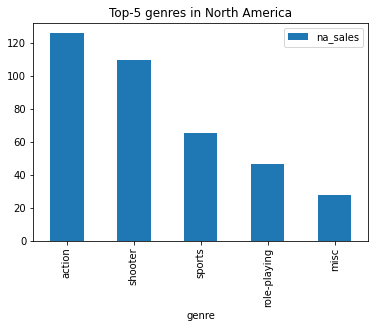

In [60]:
df_na_genre.plot(kind='bar', y='na_sales', title='Top-5 genres in North America')
plt.show()

Самые популярные жанры игр в Северной Америке: боевики, шутеры, спорт, ролевые игры и музыкальные игры.

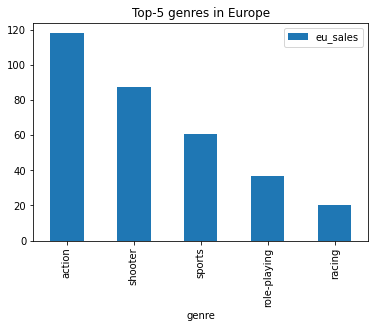

In [61]:
df_eu_genre.plot(kind='bar', y='eu_sales', title='Top-5 genres in Europe')
plt.show()

Самые популярные жанры игр в Европе: боевики, шутеры, спорт, ролевые игры и гонки.

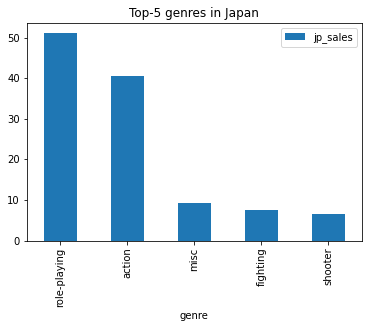

In [62]:
df_jp_genre.plot(kind='bar', y='jp_sales', title='Top-5 genres in Japan')
plt.show()

Самые популярные жанры игр в Японии: ролевые игры, боевики, музыкальные игры, драки и шутеры.

Разница в популярности жанров игр связана с культурными особенностями. Поскольку услвоия быта и культура стран Европы и Северной Америки похожи, то и их предпочтения по жанрам игр похожи. В Японии ролевые игры выходят на первый план, поскольку в культурной жизни молодёжи в Японии огромную роль играют аниме. На основе аниме создаются ролевые игры, где каждый человек может стать своим любимым персонажем.

In [63]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [64]:
df['rating'] = df['rating'].fillna('No rating')

In [65]:
df_na_rating = df.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
df_eu_rating = df.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
df_jp_rating = df.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

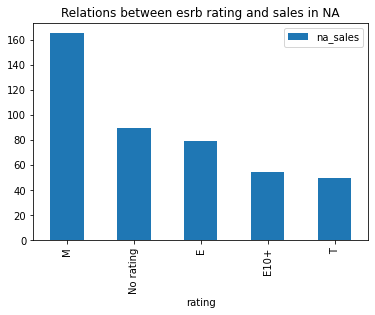

In [66]:
df_na_rating.plot(kind='bar', y='na_sales', title='Relations between esrb rating and sales in NA')
plt.show()

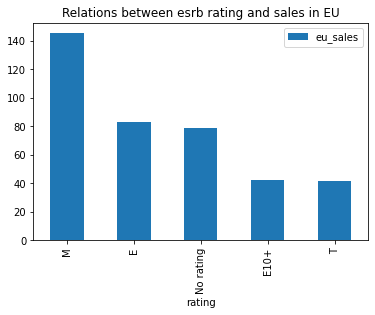

In [67]:
df_eu_rating.plot(kind='bar', y='eu_sales', title='Relations between esrb rating and sales in EU')
plt.show()

В связи с культурной близостью Европы и Северной Америки продажи по рейтингам ESRB практически идентичны. В порядке убвания зависимость продаж от рейтинга выглядит так: M --> E --> E10+ --> T. Также важно учесть, что доля игр без рейтинга в Европе и Северной Америке высока.

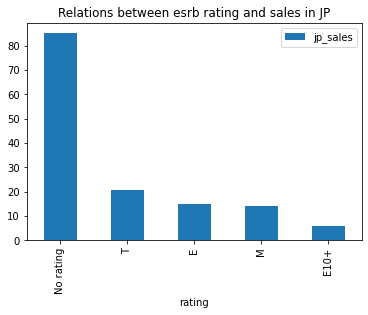

In [68]:
df_jp_rating.plot(kind='bar', y='jp_sales', title='Relations between esrb rating and sales in JP')
plt.show()

Поскольку в Японии аниме особенно популярно среди подростков (то есть ролевые игры популярны тоже преимущетсвенно среди подростоков), то выстраивается следующая картина зависимости продаж от рейтинга ESRB (в порядке убывания): Е --> E --> M --> E10+. На первом месте в Японии игры без рейтинга. Возможно это связано с тем, что эти игры создавалсиь для локального рынка, поэтому мировые рейтинги их не учитывали.

### Выводы

1. Самые популярные платформы для игр в Северной Америке - это ps4, xone, x360. В Северной Америке основная конкуренция сосредоточена между двумя компаниями Playstation и Xbox. Они делят лидирующие позиции, так как Xbox американская компания и они лучше могут готовить рекламную компанию, так как хорошо знают своих клиентов. Playstation же лидирует, так как это самая популярная платформа в мире и в ней самая большая библиотека игр.
2. В Европе лидер очевиден, так как чуть больше трети рынка - это ps4. В Европе на первый план вырывается сам продукт с его характеристиками и играми.
3. В Японии в лидеры вырывается японская платформа 3ds (почти 50% рынка). Среди возможных причин: лучшее знание японского рынка и потребности населения Японии, более эффективная реклама на территории страны производителя.
4. Самые популярные жанры игр в Северной Америке: боевики, шутеры, спорт, ролевые игры и музыкальные игры.
5. Самые популярные жанры игр в Европе: боевики, шутеры, спорт, ролевые игры и гонки.
6. Самые популярные жанры игр в Японии: ролевые игры, боевики, музыкальные игры, драки и шутеры.
7. Разница в популярности жанров игр связана с культурными особенностями. Поскольку услвоия быта и культура стран Европы и Северной Америки похожи, то и их предпочтения по жанрам игр похожи. В Японии ролевые игры выходят на первый план, поскольку в культурной жизни молодёжи в Японии огромную роль играют аниме. На основе аниме создаются ролевые игры, где каждый человек может стать своим любимым персонажем.
8. В связи с культурной близостью Европы и Северной Америки продажи по рейтингам ESRB практически идентичны. В порядке убвания зависимость продаж от рейтинга выглядит так: M --> E --> E10+ --> T.
9. Поскольку в Японии аниме особенно популярно среди подростков (то есть ролевые игры популярны тоже преимущетсвенно среди подростоков), то выстраивается следующая картина зависимости продаж от рейтинга ESRB (в порядке убывания): Е --> E --> M --> E10+

## Проверка гипотез

Базовые гипотезы формируются исходя из равенства двух наблюдаемых событий. Альтернативная же гипотеза формируется исходя из обратной базовой гипотезы, поэтому получаем следующие две базовые гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.

Альтернативными будут являтся соотвествующие гипотезы: 
1. Средние пользовательские рейтинги платформ Xbox One и PC неодинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Критерием для проверки гипотез будет считаться равенство средних двух  выборок. В таком случае можно будет говорить об истинности двух нулевых гипотез. Уровень статистической значимости (alpha) = 5%.

### Базовая гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [69]:
df_xone_rating = df.query('platform == "xone"')['user_score'].dropna()
df_pc_rating = df.query('platform == "pc"')['user_score'].dropna()
print('Дисперсия выборки xone и её длина', np.var(df_xone_rating), '|', len(df_xone_rating))
print('Дисперсия выборки pc и её длина', np.var(df_pc_rating), '|', len(df_pc_rating))

Дисперсия выборки xone и её длина 1.8965188383045533 | 182
Дисперсия выборки pc и её длина 3.0163063475546332 | 155


In [70]:
result = st.ttest_ind(df_xone_rating, df_pc_rating, equal_var=False)
alpha = 0.05
print('pvalue:', result.pvalue)
if result.pvalue < alpha:
    print('Нулевая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые,  отвергается.')
else:
    print('Нулевая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, не отвергается.')

pvalue: 0.14759594013430463
Нулевая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, не отвергается.


### Базовая гипотеза 2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны

In [71]:
df_action_us = df.query('genre == "action"')['user_score'].notna()
df_sport_us = df.query('genre == "sports"')['user_score'].notna()
print('Дисперсия оценки пользователей по жанру action и её длина', np.var(df_action_us), '|', len(df_action_us))
print('Дисперсия оценки пользователей по жанру sports и её длина', np.var(df_sport_us), '|', len(df_sport_us))

Дисперсия оценки пользователей по жанру action и её длина 0.249938645706222 | 766
Дисперсия оценки пользователей по жанру sports и её длина 0.18866276530701373 | 214


In [72]:
results = st.ttest_ind(df_action_us ,df_sport_us, equal_var=False)
print('pvalue', results.pvalue)
if results.pvalue < alpha:
    print('Нулевая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports равны, отвергается.')
else:
    print('Нулевая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports равны, не отвергается')

pvalue 2.324411835675499e-11
Нулевая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports равны, отвергается.


In [73]:
print('Средняя оценка пользователей по жанру action:', df_action_us.mean())
print('Средняя оценка пользователей по жанру sports:', df_sport_us.mean())

Средняя оценка пользователей по жанру action: 0.5078328981723238
Средняя оценка пользователей по жанру sports: 0.7476635514018691


### Выводы

Гипотезы. Поскольку выборки разных размеров, а их дисперсии отличаются в среднем на 30%, то переменная equal_var принимает значение False. Для проверки первой гипотезы использовался метод ttest_ind, так как он сравнивает средние двух выборок. Решение о принятии или не принятии гипотезы исходит исходя из значения pvalue - уровень значимости этой стаситики (вероятность получить наблюдаемый результат), пороговое значение которой для данной выборки установлено alpha = 5%.

**Нулевая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, не отвергается.**

**Нулевая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports равны, отвергается.**

Средняя оценка пользователей по жанру action выше на 50% средней оценки по жанру sports.

## Общие выводы

1. Названия столбцов приведены к общему виду и к нижнему регистр.
2. Пропуски в столбце с названием игры заменить нельзя, так как информации недостаточно для ее определения.
3. Пропуски в столбце с датой релиза менять не следует. Возможен вариант замены пропусков на среднее значение годов выпуска игр по платформам, но поскольку обнолвения платформ проводятся редко, то имеется большой риск искозить данные.
4. Столбец с оценкой критиков. В данном случае есть два варианта работы: замена пропусков на медианное значение по жанру и оставление пропусков. Поскольку пропусков слишком много не следует заменять на медианное значение, поскольку в случае появления в последствии оценок критиков правильный сдвиг происходить не будет из-за большое концентрации оценок на медианном значении.
5. Значения "tbd" в столбце с оценкой пользователей можно заменить вместе с пропущенными значениями (Nan), так как данное решение статистику не искозит.
6. Столбец с рейтингом. Пропуски в данном случае трогать не следует, так как неизвестно нет достаточных оснаваний полагать, какой рейтинг будет у той или иной игры. 
7. Данных по вриведённым двум играм (где пропуски в их наименованиях) практически нет, объёмы продаж в разных странах небольшой, поэтому удаление этих строчек никак не отразится на результатах анализа.
8. Столбцы со строчными данными приведены к нижнему регистру для удобного поиска дубликатов в следующем разделе.
9. Исходя из построенного графика частоты релиза игр по годам можно сделать вывод, что сфера гейминга начала становится очень популярна начиная с 2000-ых годов.
10. По графику суммарных продаж по платформам видно, что c 2004 по 2006 в год появлялось минимум по 1 платформе (в 2006 сразу две).
11. В среднем новые платформы живут 11-12 лет (если рассматривать топ 10 платформ). Если рассматривать все платформы то в среднем платформы живут 7-8 лет.
12. Акутальным периодом будет считаться 2013-2016 гг., с момента появления ps4.
13. По графику 'Sum sales in actual period' видно, что только две платформы имеют положите тренды - это xone и ps4. Все остальные имеют отрицательные тренды.
14. По графику 'Sum sales in actual period' можно сделать вывод, что продажам лидируют следующие 5 платформ: ps4, xone, ps3, x360, 3ds.
15. Потенциально прибыльные платформы - эплатформы имеющие положительный тренд (xone и ps4). Но также к потенциально прибыльном можно отнести PC (хоть и наблюдается небольшая отрицательная корреляция), но продажи по ним более стабильны (отсутствуют резкие отклонения).
16. Корреляция между оценками пользователей и продажами игры на платформе ps4 отсутствует. Встречаются случаи, когда когда высокие оценки совпадают с высокими продажами, что может быть связано с хорошо сформированным коммьюнити определённой игры. Это объясняет ещё и то, почему оценки пользователей могут быть невысокими, но продажи высокими.
17. Существует прямая умеренная корреляция между проадажами и рейтингом критиков. Это связано с тем, что многие игроки в процессе решения выбора игры ориентируются на оценки критиков. Связь не является сильной, так как мнение критиков не всегда сходится с мнением игроков. Некоторые игроки больше склонны доверять мнению игроков.
18. Единой картины между связью оценки пользователей и продажами нет. В основном превалирует ситуация с слобой прямой корреляцией (исключение dc - слабая отрицательная корреляция). Корреляция же между оценкой критиков и продажами носит либо прямой слабый, либо прямой умеренный характер.
19. Самые продаваемые жанры игры выпускаются на самых продаваемых платформах.
20. Самые популярные платформы для игр в Северной Америке - это ps4, xone, x360. В Северной Америке основная конкуренция сосредоточена между двумя компаниями Playstation и Xbox. Они делят лидирующие позиции, так как Xbox американская компания и они лучше могут готовить рекламную компанию, так как хорошо знают своих клиентов. Playstation же лидирует, так как это самая популярная платформа в мире и в ней самая большая библиотека игр.
21. В Европе лидер очевиден, так как чуть больше трети рынка - это ps4. В Европе на первый план вырывается сам продукт с его характеристиками и играми.
22. В Японии в лидеры вырывается японская платформа 3ds (почти 50% рынка). Среди возможных причин: лучшее знание японского рынка и потребности населения Японии, более эффективная реклама на территории страны производителя.
23. Самые популярные жанры игр в Северной Америке: боевики, шутеры, спорт, ролевые игры и музыкальные игры.
24. Самые популярные жанры игр в Европе: боевики, шутеры, спорт, ролевые игры и гонки.
25. Самые популярные жанры игр в Японии: ролевые игры, боевики, музыкальные игры, драки и шутеры.
26. Разница в популярности жанров игр связана с культурными особенностями. Поскольку услвоия быта и культура стран Европы и Северной Америки похожи, то и их предпочтения по жанрам игр похожи. В Японии ролевые игры выходят на первый план, поскольку в культурной жизни молодёжи в Японии огромную роль играют аниме. На основе аниме создаются ролевые игры, где каждый человек может стать своим любимым персонажем.
27. В связи с культурной близостью Европы и Северной Америки продажи по рейтингам ESRB практически идентичны. В порядке убвания зависимость продаж от рейтинга выглядит так: M --> E --> E10+ --> T.
28. Поскольку в Японии аниме особенно популярно среди подростков (то есть ролевые игры популярны тоже преимущетсвенно среди подростоков), то выстраивается следующая картина зависимости продаж от рейтинга ESRB (в порядке убывания): Е --> E --> M --> E10+
29. Средняя оценка пользователей по жанру action выше на 50% средней оценки по жанру sports.
30. Нулевая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, не отвергается.
31. Нулевая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports равны, отвергается.

Исходя из вышесказанного, можно выделить следующие факторы, определяющие успешность игры: платформы игры, жанр, оценка критиков, регион (со всеми его мнофакторными особенностями), рейтинг ESRB. Основываясь на эти факторы можно сделать ставку на популярный продукт и спланировать рекламные компании.